<a href="https://colab.research.google.com/github/cidcom/satellite-cloud-removal-dip/blob/main/01-Example-Use-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# GitHub import and package installation
These two actions should take about 1-2 minutes. Then you're ready to go.

üöÄ **To use GPU go to** `Runtime` -> `Change Runtime Type` -> `Hardware Accelerator: GPU`

In [2]:
! git clone https://github.com/cidcom/satellite-cloud-removal-dip

Cloning into 'satellite-cloud-removal-dip'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 92 (delta 34), reused 52 (delta 13), pack-reused 0
Unpacking objects: 100% (92/92), 5.19 MiB | 5.86 MiB/s, done.


In [3]:
!pip install -q rasterio pytorch-lightning

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.9/20.9 MB 34.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 825.8/825.8 KB 31.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 517.2/517.2 KB 29.2 MB/s eta 0:00:00


In [4]:
import sys
sys.path.append('./satellite-cloud-removal-dip/')

from src import *
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (20, 10)

## Example Cloud Image with a Cloud-Shadow Mask üå•

In [5]:
s2_image = s2_preprocess('./satellite-cloud-removal-dip/data/example_sample/S2/S1_3c120554-3873-4de2-bcc3-23ae00d28c4f_S2_76dac503-47d7-446b-b92d-56f4dd10f8e2_0_0_256x256.tif')

with open('./satellite-cloud-removal-dip/data/example_sample/mask.npy', 'rb') as f:
    mask = np.load(f)

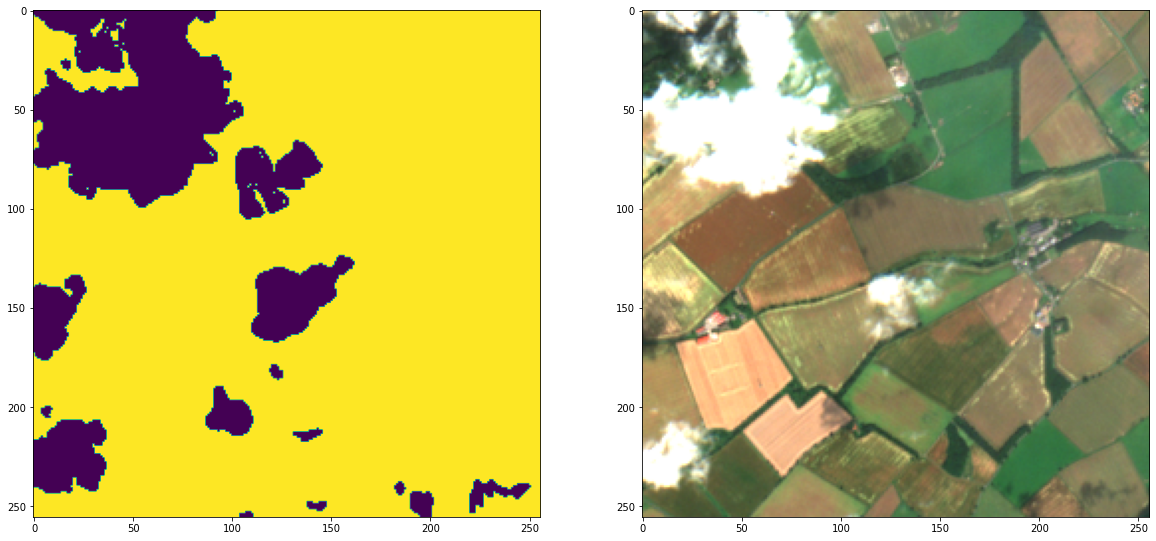

In [6]:
plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
plt.imshow(s2_image)

### Supporting Data: Sentinel-1 SAR and a yearly Sentinel-2 average from 2019

In [7]:
s1_image = s1_preprocess('./satellite-cloud-removal-dip/data/example_sample/S1/S1_3c120554-3873-4de2-bcc3-23ae00d28c4f_S2_76dac503-47d7-446b-b92d-56f4dd10f8e2_0_0_256x256.tif',
                         to_db = True)

with open('./satellite-cloud-removal-dip/data/2019_mean.npy', 'rb') as f:
    s2_mean = np.load(f)

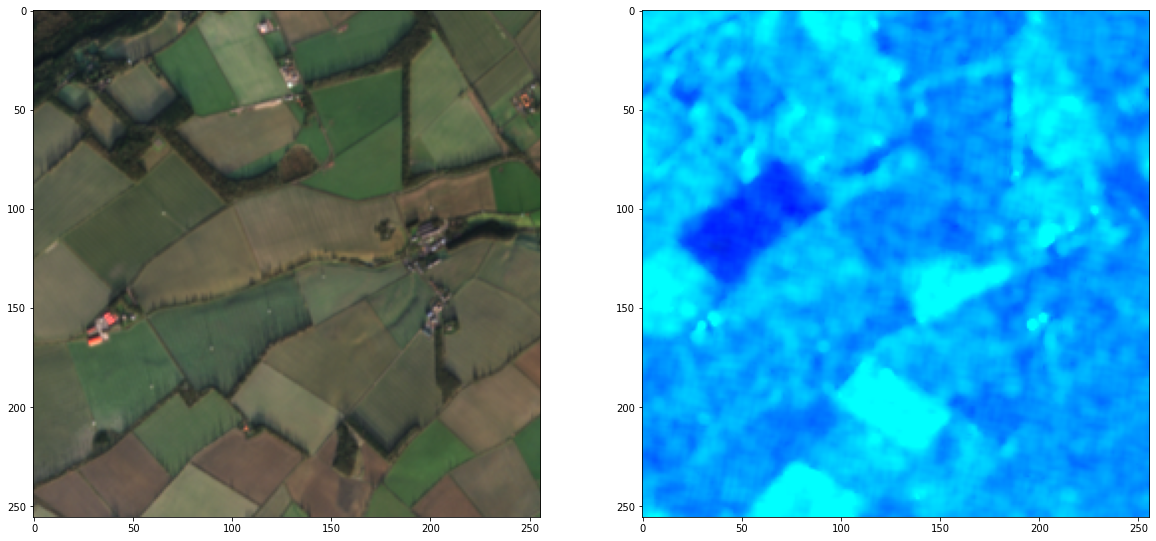

In [8]:
plt.subplot(1,2,1)
plt.imshow(s2_mean)
plt.subplot(1,2,2)
plt.imshow(rgb(s1_image))

## Initialize Model and Train üèã
The ttraining should take about 10 minutes with the resources provided by Google Colab

In [9]:
my_model = LitDIP()

my_model.set_target([s2_image, s2_mean, s1_image])
my_model.set_mask([mask,
                   np.ones(mask.shape),
                   np.ones(mask.shape)])

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
trainer = pl.Trainer(
    max_epochs = 4,            
    logger=False,
    gpus = [0]
)
trainer.fit(my_model)

TypeError: ignored

In [ ]:
result, _, _ = my_model.output() # the two unused (_) variables correspond to s2_mean reconstruction and s1_image reconstruction

In [ ]:
plt.subplot(1,3,1)
plt.imshow(mask)
plt.axis('off')
plt.title('Cloud Mask')
plt.subplot(1,3,2)
plt.imshow(s2_image)
plt.axis('off')
plt.title('Cloud Mask')
plt.subplot(1,3,3)
plt.imshow(result)
plt.axis('off')
plt.title('Results')